In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fire = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/fire.csv")
fire.head()


,OID_,FIRE_YEAR,FORESTNAME,GIS_ACRES,COUNT
0,1,2016,"Grand Mesa, Uncompahgre and Gunnison National ...",11.718000,1.0
1,2,2017,Arapaho and Roosevelt National Forests,170.498993,1.0
2,3,2016,White River National Forest,22.653000,1.0
3,4,2017,White River National Forest,976.127991,1.0
4,5,2019,Arapaho and Roosevelt National Forests,1028.243042,1.0


I have 176 fires among the forests from 2016-2020. These data come from multiple raster processing in ArcGIS.

In [3]:
fire.shape

(176, 5)

In [4]:
fire = fire.drop(['OID_'], axis=1) # drop OID_ colummn

Counting number of firest, all years, by forest

In [5]:
a = fire.groupby('FORESTNAME').agg({'COUNT':['sum']})
a

,COUNT
,sum
FORESTNAME,
Arapaho and Roosevelt National Forests,43.0
"Grand Mesa, Uncompahgre and Gunnison National Forests",18.0
Manti-La Sal National Forest,3.0
Medicine Bow-Routt National Forest,15.0
Pike and San Isabel National Forests,43.0
Rio Grande National Forest,4.0
San Juan National Forest,23.0
White River National Forest,27.0


Counting the number of acres burned, all years, by forest

In [6]:
b = fire.groupby('FORESTNAME').agg({'GIS_ACRES':['sum']})
b

,GIS_ACRES
,sum
FORESTNAME,
Arapaho and Roosevelt National Forests,243496.413503
"Grand Mesa, Uncompahgre and Gunnison National Forests",40738.499629
Manti-La Sal National Forest,244.146804
Medicine Bow-Routt National Forest,356497.174450
Pike and San Isabel National Forests,316794.742782
Rio Grande National Forest,331.613000
San Juan National Forest,90297.516856
White River National Forest,67688.236783


Combining these two tables...

In [7]:
c = pd.concat([a, b.reindex(a.index)], axis=1).reset_index(drop=False)
c

,FORESTNAME,COUNT,GIS_ACRES
,,sum,sum
0,Arapaho and Roosevelt National Forests,43.0,243496.413503
1,"Grand Mesa, Uncompahgre and Gunnison National ...",18.0,40738.499629
2,Manti-La Sal National Forest,3.0,244.146804
3,Medicine Bow-Routt National Forest,15.0,356497.174450
4,Pike and San Isabel National Forests,43.0,316794.742782
5,Rio Grande National Forest,4.0,331.613000
6,San Juan National Forest,23.0,90297.516856
7,White River National Forest,27.0,67688.236783


In [8]:
c.columns # The column names got messed up so I will fix that in the next cell

MultiIndex([('FORESTNAME',    ''),
            (     'COUNT', 'sum'),
            ( 'GIS_ACRES', 'sum')],
           )

In [9]:
c.columns = [' '.join(col).strip() for col in c.columns.values]
c.columns

Index(['FORESTNAME', 'COUNT sum', 'GIS_ACRES sum'], dtype='object')

In [10]:
c.rename(columns = {'GIS_ACRES sum':'ACRES_BURNED', 'COUNT sum': 'NUM_FIRES'}, inplace = True)
c.head()

,FORESTNAME,NUM_FIRES,ACRES_BURNED
0,Arapaho and Roosevelt National Forests,43.0,243496.413503
1,"Grand Mesa, Uncompahgre and Gunnison National ...",18.0,40738.499629
2,Manti-La Sal National Forest,3.0,244.146804
3,Medicine Bow-Routt National Forest,15.0,356497.174450
4,Pike and San Isabel National Forests,43.0,316794.742782


I will pull additional data from a data frame that I built in ArcGIS from raster and shapefile analysis.

In [11]:
df = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/df.csv")

Here's a look at the data in this table.

In [12]:
df.columns

Index(['OID_', 'FORESTNAME', 'ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MIN',
       'SLOPE_MAX', 'SLOPE_MEAN', 'SNOW_MIN', 'SNOW_MAX', 'SNOW_MEAN',
       'MEAN_TEMP', 'MEAN_PRECIP', 'MEAN_EVAP', 'MEAN_SM', 'WATER_ICE',
       'WETLANDS', 'BARREN', 'DEVELOPED', 'FOREST', 'SHRUB_SCRUB',
       'HERBACEOUS', 'AGRICULTURE', 'TOTAL_AREA', 'PER_FOREST',
       'PER_CHG_FOREST', 'PER_CHG_BARREN', 'PER_CHG_SCRUB', 'MIN_DM', 'MAX_DM',
       'GIS_ACRES', 'FIRE_COUNT', 'SUM_FIRES_ACRES', 'FOREST_ACRES',
       'ACRES_BURNED', 'PER_BURNED'],
      dtype='object')

In [13]:
d = df[['FORESTNAME','FOREST_ACRES']].reset_index(drop=True)
d

,FORESTNAME,FOREST_ACRES
0,Manti-La Sal National Forest,4.525520e+07
1,Pike and San Isabel National Forests,8.176268e+08
2,Rio Grande National Forest,2.324749e+07
3,Carson National Forest,0.000000e+00
4,San Juan National Forest,2.702111e+08
5,Arapaho and Roosevelt National Forests,5.756056e+08
6,"Grand Mesa, Uncompahgre and Gunnison National ...",4.099199e+08
7,White River National Forest,2.706159e+08
8,Medicine Bow-Routt National Forest,2.112714e+08


In [14]:
d = d.drop([3]) # dropping Carson National Forest

In [15]:
d = d.sort_values(by='FORESTNAME', ascending=True).reset_index(drop=True)
d

,FORESTNAME,FOREST_ACRES
0,Arapaho and Roosevelt National Forests,5.756056e+08
1,"Grand Mesa, Uncompahgre and Gunnison National ...",4.099199e+08
2,Manti-La Sal National Forest,4.525520e+07
3,Medicine Bow-Routt National Forest,2.112714e+08
4,Pike and San Isabel National Forests,8.176268e+08
5,Rio Grande National Forest,2.324749e+07
6,San Juan National Forest,2.702111e+08
7,White River National Forest,2.706159e+08


Now I can merge table c and d

In [16]:
e = pd.merge(c, d, left_index=True, right_index=True)
e

,FORESTNAME_x,NUM_FIRES,ACRES_BURNED,FORESTNAME_y,FOREST_ACRES
0,Arapaho and Roosevelt National Forests,43.0,243496.413503,Arapaho and Roosevelt National Forests,5.756056e+08
1,"Grand Mesa, Uncompahgre and Gunnison National ...",18.0,40738.499629,"Grand Mesa, Uncompahgre and Gunnison National ...",4.099199e+08
2,Manti-La Sal National Forest,3.0,244.146804,Manti-La Sal National Forest,4.525520e+07
3,Medicine Bow-Routt National Forest,15.0,356497.174450,Medicine Bow-Routt National Forest,2.112714e+08
4,Pike and San Isabel National Forests,43.0,316794.742782,Pike and San Isabel National Forests,8.176268e+08
5,Rio Grande National Forest,4.0,331.613000,Rio Grande National Forest,2.324749e+07
6,San Juan National Forest,23.0,90297.516856,San Juan National Forest,2.702111e+08
7,White River National Forest,27.0,67688.236783,White River National Forest,2.706159e+08


In [17]:
# dropping the redundant column

e = e.drop(['FORESTNAME_y'], axis=1) 

In [18]:
#cleaning col names

e = e.rename(columns={'FORESTNAME_x': 'FOREST NAME', 'COUNT sum': 'NUM FIRES', 'GIS_ACRES sum': 'ACRES_BURNED', 'FOREST_ACRES':'TOTAL_ACRES'})

This next cell computes the percentage of each forest that has burned and passes those values into a list which I can then copy into a new table column.

In [19]:
list = []

for i in range(len(e)):
    list.append(e['ACRES_BURNED'][i].sum() / e['TOTAL_ACRES'][i] * 100)
print(list)

[0.04230264934582084, 0.009938159861916476, 0.0005394889114673591, 0.16873893206934965, 0.038745639102171714, 0.0014264464226251363, 0.033417392694655094, 0.025012662903731615]


In [20]:
e['PER_BURNED'] = list
e

,FOREST NAME,NUM_FIRES,ACRES_BURNED,TOTAL_ACRES,PER_BURNED
0,Arapaho and Roosevelt National Forests,43.0,243496.413503,5.756056e+08,0.042303
1,"Grand Mesa, Uncompahgre and Gunnison National ...",18.0,40738.499629,4.099199e+08,0.009938
2,Manti-La Sal National Forest,3.0,244.146804,4.525520e+07,0.000539
3,Medicine Bow-Routt National Forest,15.0,356497.174450,2.112714e+08,0.168739
4,Pike and San Isabel National Forests,43.0,316794.742782,8.176268e+08,0.038746
5,Rio Grande National Forest,4.0,331.613000,2.324749e+07,0.001426
6,San Juan National Forest,23.0,90297.516856,2.702111e+08,0.033417
7,White River National Forest,27.0,67688.236783,2.706159e+08,0.025013


In [21]:
e.shape

(8, 5)

In [22]:
f = pd.pivot_table(fire, values=['COUNT', 'GIS_ACRES'], index=['FORESTNAME', 'FIRE_YEAR'], aggfunc=np.sum)
f

COUNT  \
FORESTNAME                                         FIRE_YEAR          
Arapaho and Roosevelt National Forests             2016        12.0   
                                                   2017         9.0   
                                                   2018         4.0   
                                                   2019         8.0   
                                                   2020        10.0   
Grand Mesa, Uncompahgre and Gunnison National F... 2016         6.0   
                                                   2017         3.0   
                                                   2018         6.0   
                                                   2019         2.0   
                                                   2020         1.0   
Manti-La Sal National Forest                       2018         2.0   
                                                   2020         1.0   
Medicine Bow-Routt National Forest                 2016         3.0   
                                                   2017         2.0   
                                                   2018         7.0   
                                                   2020         3.0   
Pike and San Isabel National Forests               2016         9.0   
                                                   2017         3.0   
                                                   2018         9.0   
                                                   2019        13.0   
                                                   2020         9.0   
Rio Grande National Forest                         2018         2.0   
                                                   2020         2.0   
San Juan National Forest                           2016         3.0   
                                                   2017         5.0   
                                                   2018         8.0   
                                                   2019         3.0   
                                                   2020         4.0   
White River National Forest                        2016         4.0   
                                                   2017         6.0   
                                                   2018        10.0   
                                                   2019         3.0   
                                                   2020         4.0   

                                                                  GIS_ACRES  
FORESTNAME                                         FIRE_YEAR                 
Arapaho and Roosevelt National Forests             2016         3466.282465  
                                                   2017         1062.216011  
                                                   2018         1639.777962  
                                                   2019         2214.438056  
                                                   2020       235113.699009  
Grand Mesa, Uncompahgre and Gunnison National F... 2016         1960.573037  
                                                   2017          525.309988  
                                                   2018        37254.066608  
                                                   2019          893.095993  
                                                   2020          105.454002  
Manti-La Sal National Forest                       2018           23.223800  
                                                   2020          220.923004  
Medicine Bow-Routt National Forest                 2016        76482.170319  
                                                   2017         5861.031006  
                                                   2018        76927.929688  
                                                   2020       197226.043438  
Pike and San Isabel National Forests               2016        37877.675790  
                                                   2017          449.089008  
                

I need to flatten this table now by resetting the index

In [23]:
f = f.reset_index()
f

,FORESTNAME,FIRE_YEAR,COUNT,GIS_ACRES
0,Arapaho and Roosevelt National Forests,2016,12.0,3466.282465
1,Arapaho and Roosevelt National Forests,2017,9.0,1062.216011
2,Arapaho and Roosevelt National Forests,2018,4.0,1639.777962
3,Arapaho and Roosevelt National Forests,2019,8.0,2214.438056
4,Arapaho and Roosevelt National Forests,2020,10.0,235113.699009
5,"Grand Mesa, Uncompahgre and Gunnison National ...",2016,6.0,1960.573037
6,"Grand Mesa, Uncompahgre and Gunnison National ...",2017,3.0,525.309988
7,"Grand Mesa, Uncompahgre and Gunnison National ...",2018,6.0,37254.066608
8,"Grand Mesa, Uncompahgre and Gunnison National ...",2019,2.0,893.095993
9,"Grand Mesa, Uncompahgre and Gunnison National ...",2020,1.0,105.454002


Some years there were no fires in certain forests. For ML to work, I need to add those years to the table with a zero fire count and acres burned.

In [24]:
f_copy = f.copy()

In [25]:
# adding in missing years for Manit-La Sal NF

row1 = {'FORESTNAME': 'Manti-La Sal National Forest', 'FIRE_YEAR':2016, 'COUNT': 0}
row2 = {'FORESTNAME': 'Manti-La Sal National Forest', 'FIRE_YEAR':2017, 'COUNT': 0}
row3 = {'FORESTNAME': 'Manti-La Sal National Forest', 'FIRE_YEAR':2019, 'COUNT': 0}

f_copy = f_copy.append(row1, ignore_index=True)
f_copy = f_copy.append(row2, ignore_index=True)
f_copy = f_copy.append(row3, ignore_index=True)

In [26]:
# adding in missing years for Rio Grande NF

row4 = {'FORESTNAME': 'Rio Grande National Forest', 'FIRE_YEAR':2016, 'COUNT': 0}
row5 = {'FORESTNAME': 'Rio Grande National Forest', 'FIRE_YEAR':2017, 'COUNT': 0}
row6 = {'FORESTNAME': 'Rio Grande National Forest', 'FIRE_YEAR':2019, 'COUNT': 0}

f_copy = f_copy.append(row4, ignore_index=True)
f_copy = f_copy.append(row5, ignore_index=True)
f_copy = f_copy.append(row6, ignore_index=True)

In [27]:
# adding in missing years for Medicine Bow-Routt NF

row7 = {'FORESTNAME': 'Medicine Bow-Routt National Forest', 'FIRE_YEAR':2019, 'COUNT': 0}

f_copy = f_copy.append(row7, ignore_index=True)

Here are the added rows.

In [28]:
f_copy.tail(8)

,FORESTNAME,FIRE_YEAR,COUNT,GIS_ACRES
32,White River National Forest,2020,4.0,32558.973452
33,Manti-La Sal National Forest,2016,0.0,NaN
34,Manti-La Sal National Forest,2017,0.0,NaN
35,Manti-La Sal National Forest,2019,0.0,NaN
36,Rio Grande National Forest,2016,0.0,NaN
37,Rio Grande National Forest,2017,0.0,NaN
38,Rio Grande National Forest,2019,0.0,NaN
39,Medicine Bow-Routt National Forest,2019,0.0,NaN


I now have 40 data points. 8 forests multiplied by 5 years of data.

In [29]:
f_copy.shape

(40, 4)

In [30]:
# replacing the NaN's with 0 in the GIS_ACRES column

f_copy['GIS_ACRES'] = f_copy['GIS_ACRES'].replace(np.NaN, 0)

Now I can start stitching in the other data that are stored in df

In [31]:
g = df[['FORESTNAME', 'ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', \
    'SLOPE_MAX', 'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', \
    'PER_CHG_BARREN', 'PER_CHG_SCRUB']]

In [32]:
h = g.merge(f_copy, on='FORESTNAME', how='inner')
h.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,COUNT,GIS_ACRES
0,Manti-La Sal National Forest,1601.830322,2651.204102,2217.525985,77.892822,15.165909,89.997292,-16.412388,NaN,127.804657,2018,2.0,23.223800
1,Manti-La Sal National Forest,1601.830322,2651.204102,2217.525985,77.892822,15.165909,89.997292,-16.412388,NaN,127.804657,2020,1.0,220.923004
2,Manti-La Sal National Forest,1601.830322,2651.204102,2217.525985,77.892822,15.165909,89.997292,-16.412388,NaN,127.804657,2016,0.0,0.000000
3,Manti-La Sal National Forest,1601.830322,2651.204102,2217.525985,77.892822,15.165909,89.997292,-16.412388,NaN,127.804657,2017,0.0,0.000000
4,Manti-La Sal National Forest,1601.830322,2651.204102,2217.525985,77.892822,15.165909,89.997292,-16.412388,NaN,127.804657,2019,0.0,0.000000


So far I have a master table (h) with these column attributes

In [33]:
h.columns

Index(['FORESTNAME', 'ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MAX',
       'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', 'PER_CHG_BARREN',
       'PER_CHG_SCRUB', 'FIRE_YEAR', 'COUNT', 'GIS_ACRES'],
      dtype='object')

In [34]:
# copy

h_copy = h.copy()

Next I will beginning adding in the meteorological data, that of course, changes from year-to year. These data were obtained from geospatial analysis of numerous raster (geotiff) files from NOAA with ArcGIS

In [35]:
# loading snow data

snow16 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/snow16.csv")
snow17 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/snow17.csv")
snow18 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/snow18.csv")
snow19 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/snow19.csv")
snow20 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/snow20.csv")

In [36]:
snow16

,OID_,FORESTNAME,ZONE_CODE,COUNT,AREA,MIN,MAX,MEAN
0,1,Manti-La Sal National Forest,1,9.0,0.0144,3.544599,14.046638,8.462658
1,2,Pike and San Isabel National Forests,2,957.0,1.5312,0.000000,34.912365,8.250501
2,3,Rio Grande National Forest,3,506.0,0.8096,0.298936,65.486198,9.448179
3,4,San Juan National Forest,4,537.0,0.8592,1.879567,73.222717,19.574202
4,5,Arapaho and Roosevelt National Forests,5,676.0,1.0816,0.268031,54.540588,16.114764
5,6,"Grand Mesa, Uncompahgre and Gunnison National ...",6,815.0,1.3040,1.674115,65.936607,23.822108
6,7,White River National Forest,7,655.0,1.0480,4.306860,66.469597,27.855579
7,8,Medicine Bow-Routt National Forest,8,379.0,0.6064,10.839634,84.536934,34.161214


In [37]:
# dropping some extra columns

snow16 = snow16.drop(['OID_', 'ZONE_CODE', 'COUNT', 'AREA'], axis=1)
snow17 = snow17.drop(['OID_', 'ZONE_CODE', 'COUNT', 'AREA'], axis=1)
snow18 = snow18.drop(['OID_', 'ZONE_CODE', 'COUNT', 'AREA'], axis=1)
snow19 = snow19.drop(['OID_', 'ZONE_CODE', 'COUNT', 'AREA'], axis=1)
snow20 = snow20.drop(['OID_', 'ZONE_CODE', 'COUNT', 'AREA'], axis=1)

In [38]:
# renaming columns

#snow16 = snow16.rename(columns={"MIN": "MIN_SNOW_2016", "MAX": "MAX_SNOW_2016", "MEAN": "MEAN_SNOW_2016"})
#snow17 = snow17.rename(columns={"MIN": "MIN_SNOW_2017", "MAX": "MAX_SNOW_2017", "MEAN": "MEAN_SNOW_2017"})
#snow18 = snow18.rename(columns={"MIN": "MIN_SNOW_2018", "MAX": "MAX_SNOW_2018", "MEAN": "MEAN_SNOW_2018"})
#snow19 = snow19.rename(columns={"MIN": "MIN_SNOW_2019", "MAX": "MAX_SNOW_2019", "MEAN": "MEAN_SNOW_2019"})
#snow20 = snow20.rename(columns={"MIN": "MIN_SNOW_2020", "MAX": "MAX_SNOW_2020", "MEAN": "MEAN_SNOW_2020"})

In [39]:
# adding year columns to each table to sort

snow16["YEAR"] = 2016
snow17["YEAR"] = 2017
snow18["YEAR"] = 2018
snow19["YEAR"] = 2019
snow20["YEAR"] = 2020

In [40]:
snow16

,FORESTNAME,MIN,MAX,MEAN,YEAR
0,Manti-La Sal National Forest,3.544599,14.046638,8.462658,2016
1,Pike and San Isabel National Forests,0.000000,34.912365,8.250501,2016
2,Rio Grande National Forest,0.298936,65.486198,9.448179,2016
3,San Juan National Forest,1.879567,73.222717,19.574202,2016
4,Arapaho and Roosevelt National Forests,0.268031,54.540588,16.114764,2016
5,"Grand Mesa, Uncompahgre and Gunnison National ...",1.674115,65.936607,23.822108,2016
6,White River National Forest,4.306860,66.469597,27.855579,2016
7,Medicine Bow-Routt National Forest,10.839634,84.536934,34.161214,2016


In [41]:
snow = pd.concat([snow16, snow17, snow18, snow19, snow20], axis=0, join="outer")

In [42]:
snow.shape

(40, 5)

In [43]:
snow

,FORESTNAME,MIN,MAX,MEAN,YEAR
0,Manti-La Sal National Forest,3.544599,14.046638,8.462658,2016
1,Pike and San Isabel National Forests,0.000000,34.912365,8.250501,2016
2,Rio Grande National Forest,0.298936,65.486198,9.448179,2016
3,San Juan National Forest,1.879567,73.222717,19.574202,2016
4,Arapaho and Roosevelt National Forests,0.268031,54.540588,16.114764,2016
5,"Grand Mesa, Uncompahgre and Gunnison National ...",1.674115,65.936607,23.822108,2016
6,White River National Forest,4.306860,66.469597,27.855579,2016
7,Medicine Bow-Routt National Forest,10.839634,84.536934,34.161214,2016
0,Manti-La Sal National Forest,0.000000,0.435523,0.121678,2017
1,Pike and San Isabel National Forests,0.000000,13.105651,1.306829,2017


In [44]:
# removing duplicate cols

#snow = snow.loc[:,~snow.columns.duplicated()]
#snow.head()

In [45]:
h_copy_sorted = h_copy.sort_values(by=['FORESTNAME', 'FIRE_YEAR'])
h_copy_sorted.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,COUNT,GIS_ACRES
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009


In [46]:
snow_sorted = snow.sort_values(by=['FORESTNAME', 'YEAR'],ascending=True)
snow_sorted.head()

,FORESTNAME,MIN,MAX,MEAN,YEAR
4,Arapaho and Roosevelt National Forests,0.268031,54.540588,16.114764,2016
4,Arapaho and Roosevelt National Forests,0.000000,33.465111,4.506788,2017
4,Arapaho and Roosevelt National Forests,2.571231,74.309944,21.865008,2018
4,Arapaho and Roosevelt National Forests,2.109645,92.389198,24.392378,2019
4,Arapaho and Roosevelt National Forests,4.767814,62.716194,19.141015,2020


Now I can copy my snowfall data from snow_sorted and dump into h_sorted

In [47]:
snow_sorted_min = snow_sorted['MIN'].tolist()
snow_sorted_mean = snow_sorted['MEAN'].tolist()
snow_sorted_max = snow_sorted['MAX'].tolist()

In [48]:
h_copy_sorted['MIN_SNOW'] = snow_sorted_min
h_copy_sorted['MEAN_SNOW'] = snow_sorted_mean
h_copy_sorted['MAX_SNOW'] = snow_sorted_max

In [49]:
h_copy_sorted.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,COUNT,GIS_ACRES,MIN_SNOW,MEAN_SNOW,MAX_SNOW
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,0.268031,16.114764,54.540588
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011,0.000000,4.506788,33.465111
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962,2.571231,21.865008,74.309944
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056,2.109645,24.392378,92.389198
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009,4.767814,19.141015,62.716194


In [50]:
master = h_copy_sorted.copy()

In [51]:
#renaming col

master.rename(columns={"GIS_ACRES": "ACRES_BURNED", "COUNT": "NUM_FIRES"})

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,MIN_SNOW,MEAN_SNOW,MAX_SNOW
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.678390,83.726501,11.039901,51.328079,-5.319241,-2.888780,9.215294,2016,12.0,3466.282465,0.268031,16.114764,54.540588
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.678390,83.726501,11.039901,51.328079,-5.319241,-2.888780,9.215294,2017,9.0,1062.216011,0.000000,4.506788,33.465111
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.678390,83.726501,11.039901,51.328079,-5.319241,-2.888780,9.215294,2018,4.0,1639.777962,2.571231,21.865008,74.309944
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.678390,83.726501,11.039901,51.328079,-5.319241,-2.888780,9.215294,2019,8.0,2214.438056,2.109645,24.392378,92.389198
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.678390,83.726501,11.039901,51.328079,-5.319241,-2.888780,9.215294,2020,10.0,235113.699009,4.767814,19.141015,62.716194
25,"Grand Mesa, Uncompahgre and Gunnison National ...",1439.825562,4363.919434,2962.433464,84.800209,14.548037,72.184021,-1.700925,-0.181601,3.474243,2016,6.0,1960.573037,1.674115,23.822108,65.936607
26,"Grand Mesa, Uncompahgre and Gunnison National ...",1439.825562,4363.919434,2962.433464,84.800209,14.548037,72.184021,-1.700925,-0.181601,3.474243,2017,3.0,525.309988,0.000000,4.976767,31.310184
27,"Grand Mesa, Uncompahgre and Gunnison National ...",1439.825562,4363.919434,2962.433464,84.800209,14.548037,72.184021,-1.700925,-0.181601,3.474243,2018,6.0,37254.066608,0.230505,10.984560,49.498711
28,"Grand Mesa, Uncompahgre and Gunnison National ...",1439.825562,4363.919434,2962.433464,84.800209,14.548037,72.184021,-1.700925,-0.181601,3.474243,2019,2.0,893.095993,0.058971,20.137960,63.491432
29,"Grand Mesa, Uncompahgre and Gunnison National ...",1439.825562,4363.919434,2962.433464,84.800209,14.548037,72.184021,-1.700925,-0.181601,3.474243,2020,1.0,105.454002,0.179870,12.897215,35.151207


Now I will load in my temperature anomaly dataset that was created from yearly temperature anomaly data at the county level from NOAA's National Center for Environmental Information (NCEI), then summarized within the forest boundaries by taking an average, all in ArcGIS
https://www.ncdc.noaa.gov/cag/county/mapping/5/pcp/202012/12/anomaly

In [52]:
#loading temp data

t16 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/t16.csv")
t17 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/t17.csv")
t18 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/t18.csv")
t19 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/t19.csv")
t20 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/t20.csv")


In [53]:
# dropping cols

t16 = t16.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
t17 = t17.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
t18 = t18.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
t19 = t19.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
t20 = t20.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)

#dropping Carson NF

t16 = t16.drop([3])
t17 = t17.drop([3]) 
t18 = t18.drop([3]) 
t19 = t19.drop([3]) 
t20 = t20.drop([3]) 

In [54]:
# adding year columns to each table to sort

t16["YEAR"] = 2016
t17["YEAR"] = 2017
t18["YEAR"] = 2018
t19["YEAR"] = 2019
t20["YEAR"] = 2020

In [55]:
# renaming columns

t16 = t16.rename(columns={"MEAN_T_ANOM16": "MEAN"})
t17 = t17.rename(columns={"MEAN_T_ANOM17": "MEAN"})
t18 = t18.rename(columns={"MEAN_T_ANOM18": "MEAN"})
t19 = t19.rename(columns={"MEAN_T_ANOM19": "MEAN"})
t20 = t20.rename(columns={"MEAN_T_ANOM20": "MEAN"})

In [56]:
temp = pd.concat([t16, t17, t18, t19, t20], axis=0, join="outer")

In [57]:
temp.shape

(40, 3)

In [58]:
temp_sorted = temp.sort_values(by=['FORESTNAME', 'YEAR'],ascending=True)
temp_sorted.head()

,FORESTNAME,MEAN,YEAR
5,Arapaho and Roosevelt National Forests,1.227801,2016
5,Arapaho and Roosevelt National Forests,1.393203,2017
5,Arapaho and Roosevelt National Forests,0.980531,2018
5,Arapaho and Roosevelt National Forests,0.284998,2019
5,Arapaho and Roosevelt National Forests,1.061864,2020


In [59]:
# passing to list

temp_sorted_anom = temp_sorted['MEAN'].tolist()

In [60]:
master_copy = master.copy()

In [61]:
#copying list to new col

master_copy['TEMP_ANOM'] = temp_sorted_anom

In [62]:
master_copy.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,COUNT,GIS_ACRES,MIN_SNOW,MEAN_SNOW,MAX_SNOW,TEMP_ANOM
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,0.268031,16.114764,54.540588,1.227801
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011,0.000000,4.506788,33.465111,1.393203
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962,2.571231,21.865008,74.309944,0.980531
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056,2.109645,24.392378,92.389198,0.284998
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009,4.767814,19.141015,62.716194,1.061864


In [63]:
master_copy = master_copy.rename(columns={"GIS_ACRES": "ACRES_BURNED", "COUNT": "NUM_FIRES" })

In [64]:
master_copy.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,MIN_SNOW,MEAN_SNOW,MAX_SNOW,TEMP_ANOM
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,0.268031,16.114764,54.540588,1.227801
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011,0.000000,4.506788,33.465111,1.393203
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962,2.571231,21.865008,74.309944,0.980531
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056,2.109645,24.392378,92.389198,0.284998
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009,4.767814,19.141015,62.716194,1.061864


As far as snowfall goes, I am really only interested in the MEAN_SNOW col. This tells me the mean snowpack across the entire forest at the end of the season. It was computed using raster files from the National Weather Service's National Operational Hydrologic Remote Sensing Center. These raster were processed in ArcGIS using zonal statistics (geospatial tool).

In [65]:
master_copy = master_copy.rename(columns={"MEAN_SNOW": "AVG_PEAK_SNOWPACK"})

master_copy = master_copy.drop(['MIN_SNOW', 'MAX_SNOW' ], axis=1)

master_copy.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,16.114764,1.227801
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011,4.506788,1.393203
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962,21.865008,0.980531
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056,24.392378,0.284998
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009,19.141015,1.061864


Now I will follow a similar method to extract the precipitation anomalies for each year, for each forest, from NCEI raster data.

In [66]:
#loading precip data

p16 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/p16.csv")
p17 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/p17.csv")
p18 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/p18.csv")
p19 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/p19.csv")
p20 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/p20.csv")

In [67]:
p16.columns

Index(['OID_', 'ADMINFORES', 'REGION', 'FORESTNUMB', 'FORESTORGC',
       'FORESTNAME', 'GIS_ACRES', 'NUM_FIRES', 'Shape_Length', 'Shape_Area',
       'Polygon_Count', 'MEAN_P_ANOM16', 'SUM_Area_SQUAREKILOMETERS'],
      dtype='object')

In [68]:
# dropping cols

p16 = p16.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
p17 = p17.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
p18 = p18.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
p19 = p19.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)
p20 = p20.drop(['OID_', 'Shape_Length', 'Shape_Area', 'ADMINFORES', 'FORESTNUMB','FORESTORGC','REGION','GIS_ACRES','NUM_FIRES','Polygon_Count', 'SUM_Area_SQUAREKILOMETERS'], axis=1)

#dropping Carson NF

p16 = p16.drop([3])
p17 = p17.drop([3]) 
p18 = p18.drop([3]) 
p19 = p19.drop([3]) 
p20 = p20.drop([3]) 

In [69]:
# adding year columns to each table to sort

p16["YEAR"] = 2016
p17["YEAR"] = 2017
p18["YEAR"] = 2018
p19["YEAR"] = 2019
p20["YEAR"] = 2020

In [70]:
#renaming cols

p16 = p16.rename(columns={"MEAN_P_ANOM16": "MEAN"})
p17 = p17.rename(columns={"MEAN_P_ANOM17": "MEAN"})
p18 = p18.rename(columns={"MEAN_P_ANOM18": "MEAN"})
p19 = p19.rename(columns={"MEAN_P_ANOM19": "MEAN"})
p20 = p20.rename(columns={"MEAN_P_ANOM20": "MEAN"})

In [71]:
p16.columns

Index(['FORESTNAME', 'MEAN', 'YEAR'], dtype='object')

In [72]:
# merging into 1 table

precip = pd.concat([p16, p17, p18, p19, p20], axis=0, join="outer")

In [73]:
precip_sorted = precip.sort_values(by=['FORESTNAME', 'YEAR'],ascending=True)
precip_sorted.head()

,FORESTNAME,MEAN,YEAR
5,Arapaho and Roosevelt National Forests,-0.602411,2016
5,Arapaho and Roosevelt National Forests,0.910530,2017
5,Arapaho and Roosevelt National Forests,-1.115688,2018
5,Arapaho and Roosevelt National Forests,0.624654,2019
5,Arapaho and Roosevelt National Forests,-1.851129,2020


In [74]:
# passing to list

precip_sorted_anom = precip_sorted['MEAN'].tolist()

In [75]:
master_copy1 = master_copy.copy()

In [76]:
# copying list to new col

master_copy1['PRECIP_ANOM'] = precip_sorted_anom

In [77]:
master_copy1.head()

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM,PRECIP_ANOM
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,16.114764,1.227801,-0.602411
21,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2017,9.0,1062.216011,4.506788,1.393203,0.910530
22,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2018,4.0,1639.777962,21.865008,0.980531,-1.115688
23,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2019,8.0,2214.438056,24.392378,0.284998,0.624654
24,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2020,10.0,235113.699009,19.141015,1.061864,-1.851129


I now have 16 predictor variables, excluding the forest name and number of fires, which is what I'll be predicting.

In [78]:
master_copy1.shape

(40, 16)

Lastly I want to include (shapefile) data from the US Drought Monitor. The drought monitor is categorized data ranging from 0 (no drought) to 5 (exceptional drought). Of course these data are not produced for the forest service boundaries, so I will have to do some pre-processing in ArcGIS to extract that information. Instead of looking at mean, I will look at max drought.

In [79]:
#loading drought data

d16 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/max_drought2016.csv")
d17 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/max_drought2017.csv")
d18 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/max_drought2018.csv")
d19 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/max_drought2019.csv")
d20 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/max_drought2020.csv")

In [80]:
# droping OID_ col

d16 = d16.drop(['OID_'], axis=1)
d17 = d17.drop(['OID_'], axis=1)
d18 = d18.drop(['OID_'], axis=1)
d19 = d19.drop(['OID_'], axis=1)
d20 = d20.drop(['OID_'], axis=1)

In [81]:
# adding year columns to each table to sort

d16["YEAR"] = 2016
d17["YEAR"] = 2017
d18["YEAR"] = 2018
d19["YEAR"] = 2019
d20["YEAR"] = 2020

In [82]:
# merging into 1 table

drought = pd.concat([d16, d17, d18, d19, d20], axis=0, join="outer")

In [83]:
# sorting by forest name and year

drought_sorted = drought.sort_values(by=['FORESTNAME', 'YEAR'],ascending=True)
drought_sorted.head()

,FORESTNAME,MAX_DM,YEAR
4,Arapaho and Roosevelt National Forests,2.0,2016
4,Arapaho and Roosevelt National Forests,0.0,2017
4,Arapaho and Roosevelt National Forests,2.0,2018
4,Arapaho and Roosevelt National Forests,0.0,2019
4,Arapaho and Roosevelt National Forests,4.0,2020


In [84]:
# passing to list

max_drought_sorted = drought_sorted['MAX_DM'].tolist()

In [85]:
# a new backup copy

master_copy2 = master_copy1.copy()

In [86]:
# copying list to new col

master_copy2['MAX_DROUGHT'] = max_drought_sorted

In [87]:
# verifying the new drought col

master_copy2.head(1)

,FORESTNAME,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM,PRECIP_ANOM,MAX_DROUGHT
20,Arapaho and Roosevelt National Forests,1309.741699,4350.785156,2428.67839,83.726501,11.039901,51.328079,-5.319241,-2.88878,9.215294,2016,12.0,3466.282465,16.114764,1.227801,-0.602411,2.0


Now that I have all my training data staged in one table I will check the data for NaNs and scale my data using MinMaxScaler. I am not anticipating much missing data. In many cases, I was able to catch missing data in the ArcGIS environment and edit my tables there before exporting into this environment.

In [88]:
def count_missing(vec): 
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

In [89]:
missing = master_copy2.apply(count_missing)
print(missing)

FORESTNAME           0
ELEV_MIN             0
ELEV_MAX             0
ELEV_MEAN            0
SLOPE_MAX            0
SLOPE_MEAN           0
PER_FOREST           0
PER_CHG_FOREST       0
PER_CHG_BARREN       5
PER_CHG_SCRUB        0
FIRE_YEAR            0
NUM_FIRES            0
ACRES_BURNED         0
AVG_PEAK_SNOWPACK    0
TEMP_ANOM            0
PRECIP_ANOM          0
MAX_DROUGHT          0
dtype: int64


Looks like I did miss something after all. I will replace those values with zero, which indicates no percent change.

In [90]:
master_copy2['PER_CHG_BARREN'].fillna(0, inplace=True)

In [91]:
missing = master_copy2.apply(count_missing)
print(missing)

FORESTNAME           0
ELEV_MIN             0
ELEV_MAX             0
ELEV_MEAN            0
SLOPE_MAX            0
SLOPE_MEAN           0
PER_FOREST           0
PER_CHG_FOREST       0
PER_CHG_BARREN       0
PER_CHG_SCRUB        0
FIRE_YEAR            0
NUM_FIRES            0
ACRES_BURNED         0
AVG_PEAK_SNOWPACK    0
TEMP_ANOM            0
PRECIP_ANOM          0
MAX_DROUGHT          0
dtype: int64


In [92]:
# checking my data types

master_copy2.dtypes

FORESTNAME            object
ELEV_MIN             float64
ELEV_MAX             float64
ELEV_MEAN            float64
SLOPE_MAX            float64
SLOPE_MEAN           float64
PER_FOREST           float64
PER_CHG_FOREST       float64
PER_CHG_BARREN       float64
PER_CHG_SCRUB        float64
FIRE_YEAR              int64
NUM_FIRES            float64
ACRES_BURNED         float64
AVG_PEAK_SNOWPACK    float64
TEMP_ANOM            float64
PRECIP_ANOM          float64
MAX_DROUGHT          float64
dtype: object

I don't see any issues upfront with data types. All are numbers except the forest name. Before I transform the dataframe using MaxMinScaler I will make another copy.

In [93]:
master_copy3 = master_copy2.copy()

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
# selecting all cols but the forest name since you can't scale an object

data = master_copy3.iloc[:, 1:17]

In [96]:
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)

Let's pass the scaled data back to a dataframe

In [97]:
master_copy3.columns

Index(['FORESTNAME', 'ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MAX',
       'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', 'PER_CHG_BARREN',
       'PER_CHG_SCRUB', 'FIRE_YEAR', 'NUM_FIRES', 'ACRES_BURNED',
       'AVG_PEAK_SNOWPACK', 'TEMP_ANOM', 'PRECIP_ANOM', 'MAX_DROUGHT'],
      dtype='object')

In [98]:
df_scaled = pd.DataFrame(scaled_data, columns=['ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MAX',
       'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', 'PER_CHG_BARREN',
       'PER_CHG_SCRUB', 'FIRE_YEAR', 'NUM_FIRES', 'ACRES_BURNED',
       'AVG_PEAK_SNOWPACK', 'TEMP_ANOM', 'PRECIP_ANOM', 'MAX_DROUGHT'])
df_scaled.head()

,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM,PRECIP_ANOM,MAX_DROUGHT
0,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,-1.414214,2.104625,-0.387284,0.181118,0.555515,0.247497,-0.017358
1,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,-0.707107,1.273852,-0.425386,-0.882013,0.859049,1.242206,-1.405987
2,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,0.000000,-0.110770,-0.416233,0.707762,0.101744,-0.089966,-0.017358
3,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,0.707107,0.996928,-0.407125,0.939234,-1.174647,1.054252,-1.405987
4,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,1.414214,1.550777,3.284090,0.458281,0.250999,-0.573495,1.371272


Recall I am predicting the number of fires so I wouldn't want to use that as a predictor variable

In [99]:
# copying the number of fires for later use

df_scaled_num_fires = df_scaled['NUM_FIRES']

In [100]:
# deleting the number of fires from the scaled df so the model isn't incestious

df_scaled1 = df_scaled.drop(['NUM_FIRES'], axis=1)

In [101]:
import random

In [102]:
random_nums = [random.uniform(0,1) for _ in range(40)]

In [103]:
df_scaled1['random_nums'] = random_nums

In [104]:
df_scaled1['random_nums']

0     0.409070
1     0.940404
2     0.352930
3     0.995804
4     0.491980
5     0.784307
6     0.405228
7     0.323079
8     0.480948
9     0.891721
10    0.669351
11    0.510076
12    0.548059
13    0.883397
14    0.891884
15    0.312517
16    0.693651
17    0.651193
18    0.316331
19    0.047198
20    0.879446
21    0.308980
22    0.970754
23    0.063970
24    0.658758
25    0.929373
26    0.207126
27    0.352409
28    0.830731
29    0.416686
30    0.754520
31    0.399622
32    0.050161
33    0.899975
34    0.450209
35    0.273384
36    0.301625
37    0.464019
38    0.210658
39    0.097532
Name: random_nums, dtype: float64

Now that the data have been cleaned and scaled I can move onto the random forest classifier. I will start by splitting my data into test and train.

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X=df_scaled1 # predictors minus forest name and num_fires
y=master_copy3['NUM_FIRES'] # predictand (num_fires)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now I need to add a column df_scaled1 that is a random number between 0 and 1

Next I will train the model on the train set and perform predictions using the test set.

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train) # training the model

y_pred=clf.predict(X_test) # prediction on test set

Checking the accuracy of the model

In [109]:
from sklearn import metrics

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


That's not a very accurate model. I will optimize the model with feature importance.

In [111]:
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

10    0.124444
13    0.114224
11    0.103533
15    0.089835
12    0.086020
3     0.059939
5     0.049068
0     0.048285
9     0.047226
2     0.043470
8     0.042424
14    0.041060
6     0.039443
7     0.038883
1     0.036522
4     0.035622
dtype: float64

The most important features are at the top of the list.

Plotting the feature importance

<BarContainer object of 16 artists>

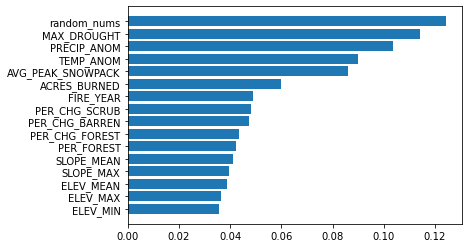

In [112]:
plt.barh(df_scaled1.columns, sorted(clf.feature_importances_))

This is not the result I was hoping for. You can see from the plot that none of the training variables have importance greater than that of a random number.

I'll try binning the number of fires into categories and see if the model does any better. I see I have a max of 13 fires in any given year for any given forest. I will categorize based on the table below and pass to a new list.

In [113]:
master_copy3['NUM_FIRES'].max() 

13.0

<p>A few fires (1) = 0-3</p>
<p>Numerous fires (2) = 4-7</p>
<p>Widespread fires (3) = 8-11</p>
<p>Extreme fire acitivity (4) = 12+</p>

In [114]:
num_fire_list = master_copy3['NUM_FIRES'].tolist()

In [115]:
my_list = [1 if 0<=i<=3 else i for i in num_fire_list] 

In [116]:
my_list = [2 if 4<=i<=7 else i for i in my_list] 

In [117]:
my_list = [3 if 8<=i<=11 else i for i in my_list] 

In [118]:
my_list = [4 if 12<=i<=15 else i for i in my_list] 

In [119]:
master_copy4 = master_copy3.copy()

In [120]:
#passing encoded fires back to df
master_copy4['FIRE_CODE'] = my_list

I'll need to rescale the df

In [121]:
data2 = master_copy4.iloc[:, 1:17]

In [122]:
scaler2 = StandardScaler()
model2 = scaler.fit(data2)
scaled_data2 = model.transform(data2)

In [123]:
df_scaled2 = pd.DataFrame(scaled_data2, columns=['ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MAX',
       'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', 'PER_CHG_BARREN',
       'PER_CHG_SCRUB', 'FIRE_YEAR', 'NUM_FIRES', 'ACRES_BURNED',
       'AVG_PEAK_SNOWPACK', 'TEMP_ANOM', 'PRECIP_ANOM', 'MAX_DROUGHT'])
df_scaled2.head()

,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM,PRECIP_ANOM,MAX_DROUGHT
0,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,-1.414214,2.104625,-0.387284,0.181118,0.555515,0.247497,-0.017358
1,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,-0.707107,1.273852,-0.425386,-0.882013,0.859049,1.242206,-1.405987
2,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,0.000000,-0.110770,-0.416233,0.707762,0.101744,-0.089966,-0.017358
3,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,0.707107,0.996928,-0.407125,0.939234,-1.174647,1.054252,-1.405987
4,-0.954972,0.450552,-1.054538,0.334724,-1.553933,-1.164318,0.335495,-0.973642,-0.343511,1.414214,1.550777,3.284090,0.458281,0.250999,-0.573495,1.371272


In [124]:
df_scaled2.min()

ELEV_MIN            -1.568656
ELEV_MAX            -2.566881
ELEV_MEAN           -1.735339
SLOPE_MAX           -1.681928
SLOPE_MEAN          -1.553933
PER_FOREST          -1.578792
PER_CHG_FOREST      -2.231947
PER_CHG_BARREN      -0.973642
PER_CHG_SCRUB       -0.520636
FIRE_YEAR           -1.414214
NUM_FIRES           -1.218467
ACRES_BURNED        -0.442221
AVG_PEAK_SNOWPACK   -1.284204
TEMP_ANOM           -1.652530
PRECIP_ANOM         -2.536653
MAX_DROUGHT         -1.405987
dtype: float64

In [125]:
df_scaled2.max()

ELEV_MIN             1.678803
ELEV_MAX             0.532716
ELEV_MEAN            1.373604
SLOPE_MAX            1.466173
SLOPE_MEAN           1.326851
PER_FOREST           1.650300
PER_CHG_FOREST       1.172932
PER_CHG_BARREN       2.551854
PER_CHG_SCRUB        2.634349
FIRE_YEAR            1.414214
NUM_FIRES            2.381550
ACRES_BURNED         3.845111
AVG_PEAK_SNOWPACK    2.118165
TEMP_ANOM            1.978195
PRECIP_ANOM          1.585206
MAX_DROUGHT          1.371272
dtype: float64

The max value in my df is 3.845111 and the min is -2.566881

In [126]:
random_nums2 = [random.uniform(-2.566881,3.845111) for _ in range(40)]

In [127]:
df_scaled2['RANDOM_NUMS'] = random_nums2

Rerunning the model...

In [128]:
X2=df_scaled2 # predictors minus forest name and num_fires
y2=master_copy4['FIRE_CODE'] # predictand (num_fires)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [129]:
clf2=RandomForestClassifier(n_estimators=100)

clf2.fit(X2_train,y2_train) # training the model

y2_pred=clf2.predict(X2_test) # prediction on test set

In [130]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 1.0


In [131]:
clf2.fit(X2_train,y2_train)
feature_imp2 = pd.Series(clf2.feature_importances_).sort_values(ascending=False)
feature_imp2

10    0.296685
11    0.100710
16    0.071589
14    0.069748
13    0.061291
12    0.060574
3     0.043252
0     0.041008
7     0.037597
8     0.035281
4     0.034895
9     0.033688
6     0.031780
5     0.023468
1     0.022189
15    0.019489
2     0.016757
dtype: float64

<BarContainer object of 17 artists>

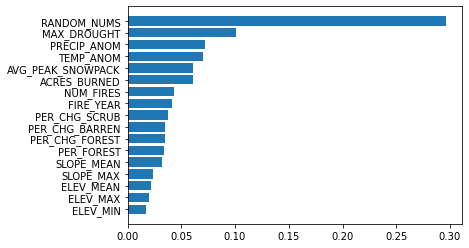

In [132]:
plt.barh(df_scaled2.columns, sorted(clf2.feature_importances_))

While I get a more accurate model, oddly, I still do not have features that are "better" than choosing random numbers. Perhaps my method is flawed.

Lastly, I will explore do a bit more EDA on the data.

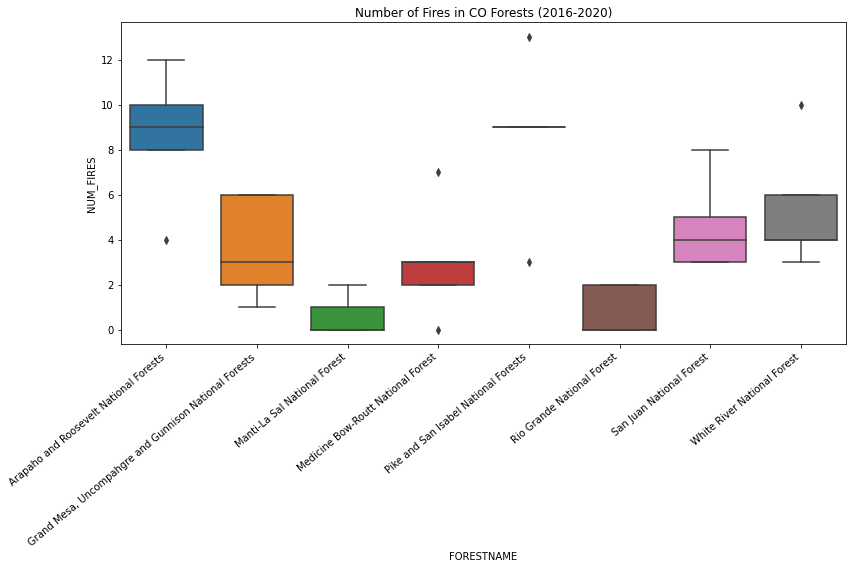

In [133]:
plt.figure(figsize=(12,8))

plt.title("Number of Fires in CO Forests (2016-2020)")

ax = sns.boxplot(x="FORESTNAME", y="NUM_FIRES", data=master_copy2)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Here is how my variables correlate to the number of fires. Surprisingly there isn't really strong correlation between the number of fires and many of the meteorological variables, such as drought index and snowpack. In fact, max elevation appears to be more correlated.

Another issue I see from the heatmap is that there is strong relationships among predictor variables, also known as, multicolinearity. Multicolinearity will adversely affect model predictions.

In [134]:
master_copy2.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,ELEV_MIN,ELEV_MAX,ELEV_MEAN,SLOPE_MAX,SLOPE_MEAN,PER_FOREST,PER_CHG_FOREST,PER_CHG_BARREN,PER_CHG_SCRUB,FIRE_YEAR,NUM_FIRES,ACRES_BURNED,AVG_PEAK_SNOWPACK,TEMP_ANOM,PRECIP_ANOM,MAX_DROUGHT
ELEV_MIN,1.0,-0.03317,0.6104,-0.2231,0.4309,0.4235,0.07179,0.5177,-0.01631,1.226e-14,-0.5799,-0.136,0.03505,0.1945,-0.2073,-0.0228
ELEV_MAX,-0.03317,1.0,0.6251,0.7427,-0.1375,-0.7152,0.8186,-0.1089,-0.9786,-3.743e-15,0.4384,0.1083,0.2898,0.6276,-0.2591,0.08864
ELEV_MEAN,0.6104,0.6251,1.0,0.4545,0.429,-0.07809,0.7404,0.2574,-0.6611,1.214e-14,-0.2066,-0.1053,0.2474,0.5589,-0.3428,0.08525
SLOPE_MAX,-0.2231,0.7427,0.4545,1.0,0.3218,-0.4234,0.6909,-0.4931,-0.6781,1.024e-14,0.4144,-0.06412,0.1775,0.5827,-0.2983,0.1045
SLOPE_MEAN,0.4309,-0.1375,0.429,0.3218,1.0,0.4987,-0.005788,-0.1959,0.1869,1.645e-14,-0.4231,-0.3465,-0.2118,0.184,-0.292,0.09143
PER_FOREST,0.4235,-0.7152,-0.07809,-0.4234,0.4987,1.0,-0.3886,0.3733,0.644,8.067e-15,-0.6008,-0.1701,-0.06187,-0.293,0.01318,-0.06758
PER_CHG_FOREST,0.07179,0.8186,0.7404,0.6909,-0.005788,-0.3886,1.0,0.05841,-0.8688,1.533e-14,0.2285,0.04174,0.4885,0.5789,-0.2132,0.0382
PER_CHG_BARREN,0.5177,-0.1089,0.2574,-0.4931,-0.1959,0.3733,0.05841,1.0,-0.07338,6.371e-15,-0.2778,0.2028,0.4312,-0.07838,0.07171,-0.07631
PER_CHG_SCRUB,-0.01631,-0.9786,-0.6611,-0.6781,0.1869,0.644,-0.8688,-0.07338,1.0,-3.88e-16,-0.4123,-0.1536,-0.4163,-0.6109,0.23,-0.06835
FIRE_YEAR,1.226e-14,-3.743e-15,1.214e-14,1.024e-14,1.645e-14,8.067e-15,1.533e-14,6.371e-15,-3.88e-16,1.0,-0.02448,0.1912,0.11,-0.2633,-0.2265,0.6996


I will further explore relationship among variables now with a pairplot.

In [135]:
sub_cols1 = master_copy2[['NUM_FIRES','ELEV_MIN', 'ELEV_MAX', 'ELEV_MEAN', 'SLOPE_MAX',
       'SLOPE_MEAN', 'PER_FOREST', 'PER_CHG_FOREST', 'PER_CHG_BARREN']]
sub_cols2 = master_copy2[['NUM_FIRES', 'PER_CHG_SCRUB', 'FIRE_YEAR', 'ACRES_BURNED',
       'AVG_PEAK_SNOWPACK', 'TEMP_ANOM', 'PRECIP_ANOM', 'MAX_DROUGHT']]

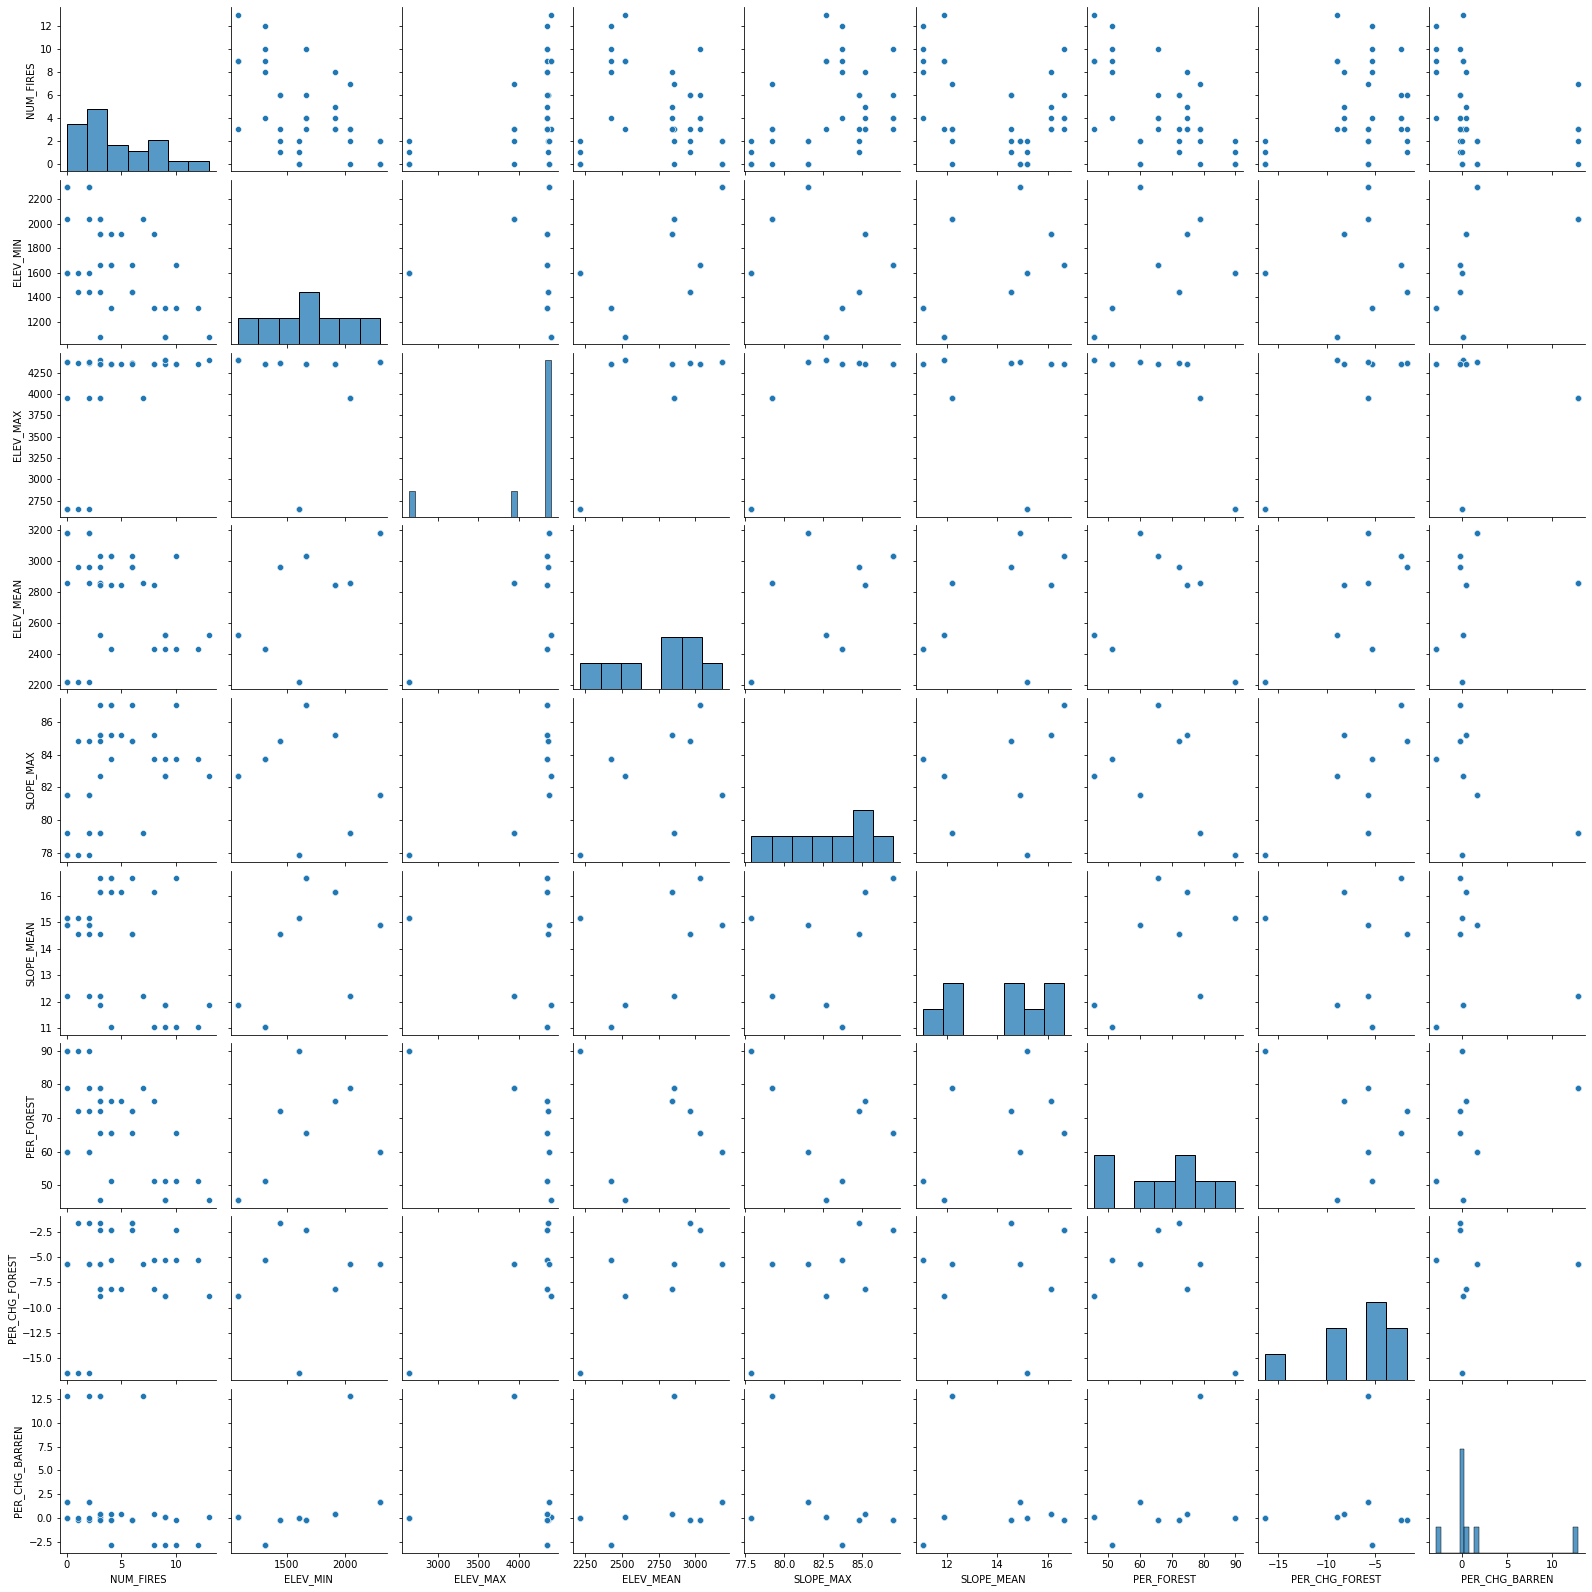

In [136]:
sns.pairplot(sub_cols1)
plt.show()

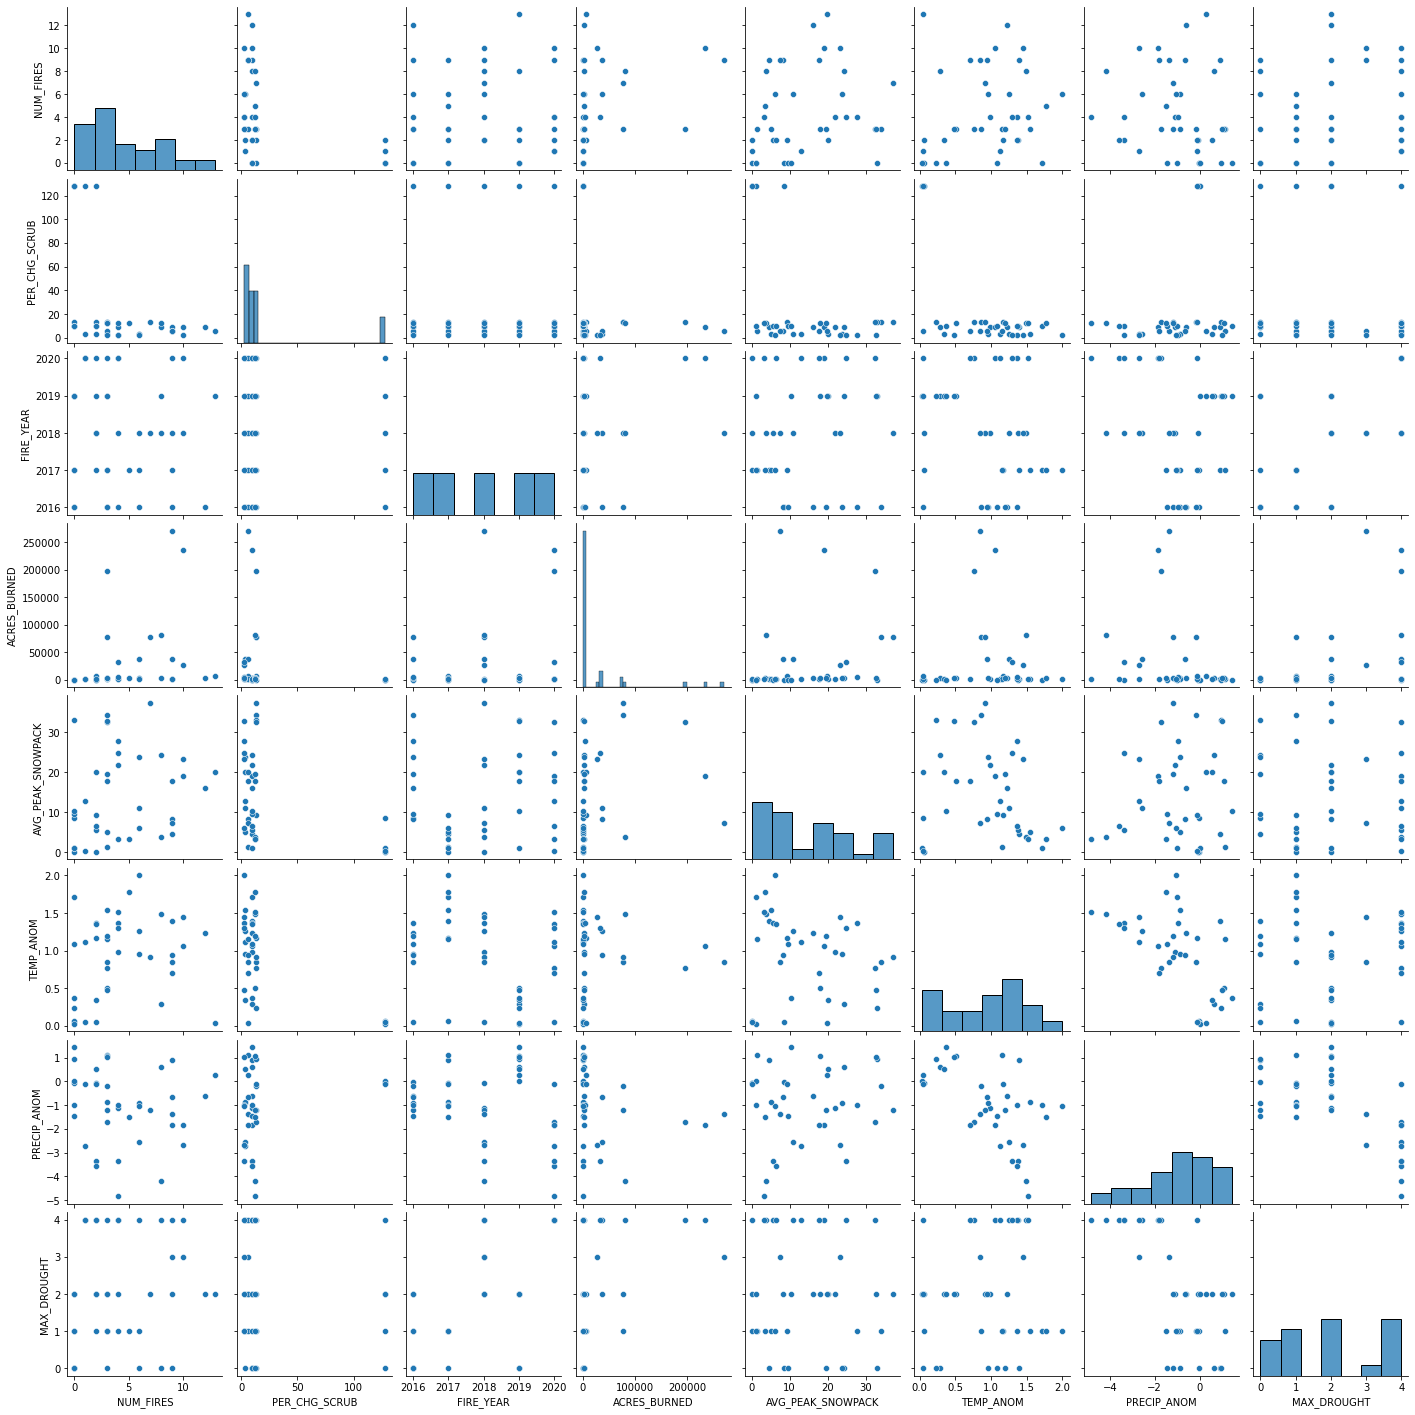

In [137]:
sns.pairplot(sub_cols2)
plt.show()

These plots show me that I really don't have strong linear relationships between any of these variables and the number of fires over the five-year period of investigation.

I will now show the number of fires by year, by forest

In [138]:
table = pd.pivot_table(fire, values=['COUNT', 'GIS_ACRES'], index=['FORESTNAME', 'FIRE_YEAR'], aggfunc=np.sum)
table

COUNT  \
FORESTNAME                                         FIRE_YEAR          
Arapaho and Roosevelt National Forests             2016        12.0   
                                                   2017         9.0   
                                                   2018         4.0   
                                                   2019         8.0   
                                                   2020        10.0   
Grand Mesa, Uncompahgre and Gunnison National F... 2016         6.0   
                                                   2017         3.0   
                                                   2018         6.0   
                                                   2019         2.0   
                                                   2020         1.0   
Manti-La Sal National Forest                       2018         2.0   
                                                   2020         1.0   
Medicine Bow-Routt National Forest                 2016         3.0   
                                                   2017         2.0   
                                                   2018         7.0   
                                                   2020         3.0   
Pike and San Isabel National Forests               2016         9.0   
                                                   2017         3.0   
                                                   2018         9.0   
                                                   2019        13.0   
                                                   2020         9.0   
Rio Grande National Forest                         2018         2.0   
                                                   2020         2.0   
San Juan National Forest                           2016         3.0   
                                                   2017         5.0   
                                                   2018         8.0   
                                                   2019         3.0   
                                                   2020         4.0   
White River National Forest                        2016         4.0   
                                                   2017         6.0   
                                                   2018        10.0   
                                                   2019         3.0   
                                                   2020         4.0   

                                                                  GIS_ACRES  
FORESTNAME                                         FIRE_YEAR                 
Arapaho and Roosevelt National Forests             2016         3466.282465  
                                                   2017         1062.216011  
                                                   2018         1639.777962  
                                                   2019         2214.438056  
                                                   2020       235113.699009  
Grand Mesa, Uncompahgre and Gunnison National F... 2016         1960.573037  
                                                   2017          525.309988  
                                                   2018        37254.066608  
                                                   2019          893.095993  
                                                   2020          105.454002  
Manti-La Sal National Forest                       2018           23.223800  
                                                   2020          220.923004  
Medicine Bow-Routt National Forest                 2016        76482.170319  
                                                   2017         5861.031006  
                                                   2018        76927.929688  
                                                   2020       197226.043438  
Pike and San Isabel National Forests               2016        37877.675790  
                                                   2017          449.089008  
                

Next I will load in a few more tables to see how land coverage has changed from 2001 to 2019.

In [139]:
lc2001 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/lc2001.csv")
lc2019 = pd.read_csv("C:/Users/john_/Documents/ArcGIS/Projects/msds696_mayers/practicum2_data/tables/lc2019.csv")

In [140]:
lc2001

,OID_,Value,Count,NLCD_Land_Cover_Class
0,1,0,467542.0,Open Water/Perennial Snow/Ice
1,2,1,1685988.0,Woody Wetlands/Emergent Herbaceous Wetlands
2,3,2,1658898.0,Barren Land
3,4,3,590215.0,"Developed, Open Space/Developed, Low Intensity..."
4,5,4,48059731.0,Deciduous Forest/Evergreen Forest/Mixed Forest
5,6,5,12079854.0,Shrub/Scrub
6,7,6,11925963.0,Herbaceous
7,8,7,862215.0,Hay/Pasture/Cultivated Crops


In [141]:
#define data
data = lc2001['Count']
data2 = lc2019['Count']
labels = ['Water/Ice', 'Wetlands', 'Barren', 'Developed', 'Forest', 'Scrub', 'Herb', 'Agriculture']
colors = sns.color_palette("Paired")

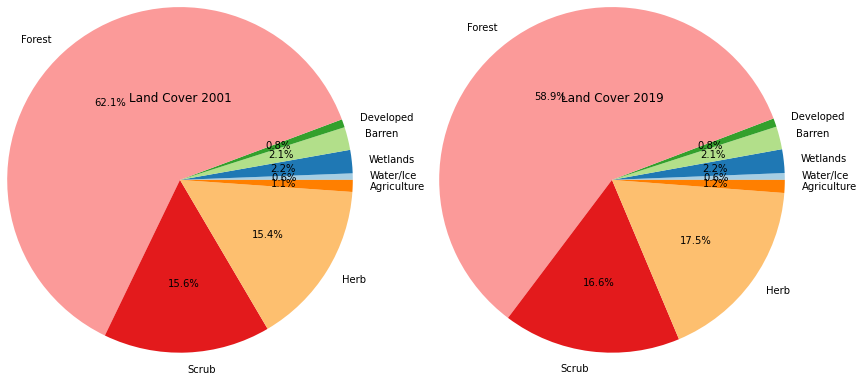

In [142]:
fig = plt.figure()


ax1 = fig.add_axes([10, 10, .5, .5], aspect=1)
ax1.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', radius = 3)
ax1.set_title('Land Cover 2001')

ax2 = fig.add_axes([10, 10, 2.5, .5], aspect=1)
ax2.pie(data2, labels=labels, colors=colors, autopct='%1.1f%%', radius = 3)
ax2.set_title('Land Cover 2019')

plt.show()

Lastly, I will plot the number of fires, by year.

In [143]:
tabletable = table.unstack(level=0) # staging the data for the plot
tabletable = table.reset_index()

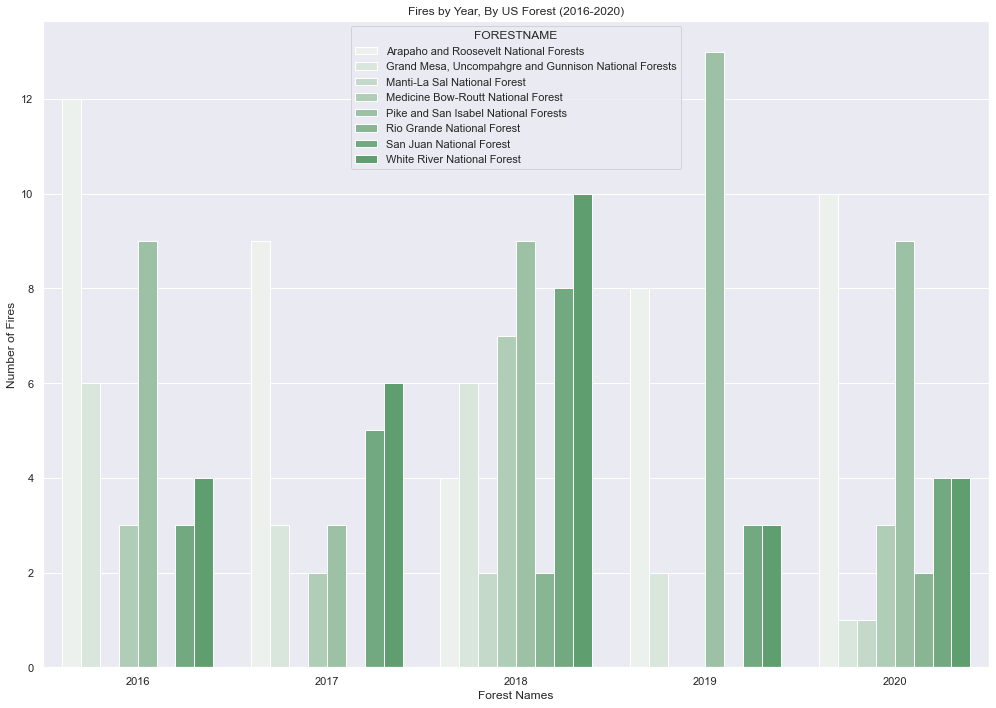

In [144]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,10)})
labels = ('Arapaho and Roosevelt National Forests',
 'Grand Mesa, Uncompahgre and Gunnison National Forests',
 'Manti-La Sal National Forest',
 'Medicine Bow-Routt National Forest',
 'Pike and San Isabel National Forests',
 'Rio Grande National Forest',
 'San Juan National Forest',
 'White River National Forest')

bar = sns.barplot(x="FIRE_YEAR", y="COUNT", data=tabletable, color= "g", hue='FORESTNAME')

plt.title("Fires by Year, By US Forest (2016-2020)")
plt.xlabel("Forest Names")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.show()

In [145]:
a1 = fire.groupby('FIRE_YEAR').agg({'COUNT':['sum']}).reset_index()
a1.columns

MultiIndex([('FIRE_YEAR',    ''),
            (    'COUNT', 'sum')],
           )

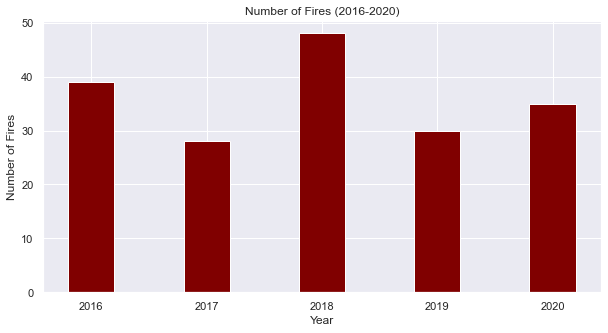

In [146]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(a1['FIRE_YEAR'], a1[(    'COUNT', 'sum')], color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires (2016-2020)")
plt.show()

In [147]:
a2 = fire.groupby('FIRE_YEAR').agg({'GIS_ACRES':['sum']}).reset_index()
a2.columns

MultiIndex([('FIRE_YEAR',    ''),
            ('GIS_ACRES', 'sum')],
           )

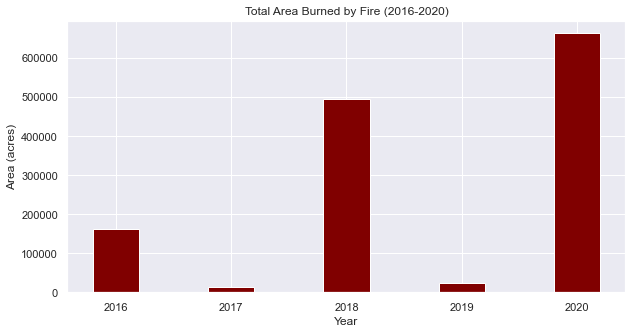

In [148]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(a2['FIRE_YEAR'], a2[('GIS_ACRES', 'sum')], color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Area (acres)")
plt.title("Total Area Burned by Fire (2016-2020)")
plt.show()

This concludes the EDA and modeling portion of the project. Numerous other visualizations (e.g., maps) were produced in ArGIS and are available in the sunnsidedever/regis_msds_practicum2 repositorty on GitHub. Additional information on the steps used to create these original datasets in ArcGIS Pro with raw, geospatial data can be found in a standalone report, called GIS_SUPPLEMENT.doc, also contained in the repository.